https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#ProblemStatement
https://github.com/RimjimRazdan/HR-Analytics/blob/master/HR%20Analytics_AV_Hackathon.ipynb

1. Hypothesis Testing
2. Data Preparation
3. EDA
4. Data Cleaning
5. Feature Selection
6. Feature Engineering
7. Model Building
8. Hyper Parameter Tuning

#### Hypothesis Testing

1. People with Masters and above degree have higher chances of promotion.
2. Peoplewith more no of trainings have knowlegde of many things hence better chances of promotion.
3. People with age higher than 28 have better chance of promotion
4. People who have stayed in company might be considered better(>2) for promotion .
5. People who have met KPI(1) will be considered more as they are better in performance.


In [3]:
# pip install catboost

In [1]:
## Import all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

pd.set_option('display.max_columns', None)

##### Read data

In [2]:
train=pd.read_csv('train.csv')

test=pd.read_csv('test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.shape

(54808, 14)

In [6]:
test.shape

(23490, 13)

#### Data Preparation

In [7]:
train['Train/Test']='Train'
train_df=train.copy()

test['Train/Test']='Test'
test_df=test.copy()

data=pd.concat([train_df,test_df],ignore_index=True)

In [8]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Train/Test
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,Train
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,Train
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,Train
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,Train
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,Train


### EDA

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  Train/Test            78298 non-null  object 
dtypes: float64(2), int6

In [11]:
100*data.isnull().sum()/len(data)

employee_id              0.000000
department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
Train/Test               0.000000
dtype: float64

We can see that education and previous_year_rating have null values which we will tackle later in the notebook

In [12]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [13]:
data[data.duplicated()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Train/Test


There are no duplicate values

###### Numerical Features Analysis

In [149]:
num_features=[]

for i in data.columns:
    if (data[i].dtype!='object'):
        num_features.append(i)
        
        
cat_features=[]

for i in data.columns:
    if (data[i].dtype=='object'):
        cat_features.append(i)

In [150]:
num_features

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

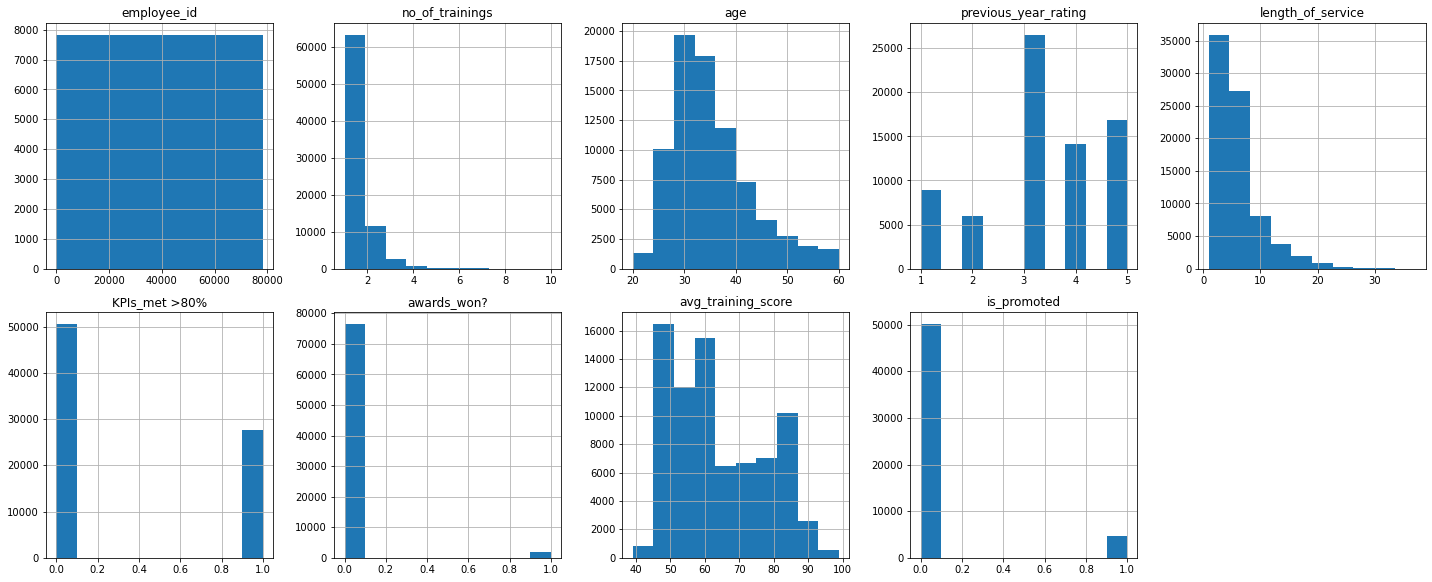

In [151]:
data[num_features].hist(figsize=(20,20),layout=(5,5))
plt.savefig('Wholedata.png')
plt.tight_layout()
plt.show()

1. No_of_trainings, length_of_service is right skewed
2. There is class imbalance in target class.

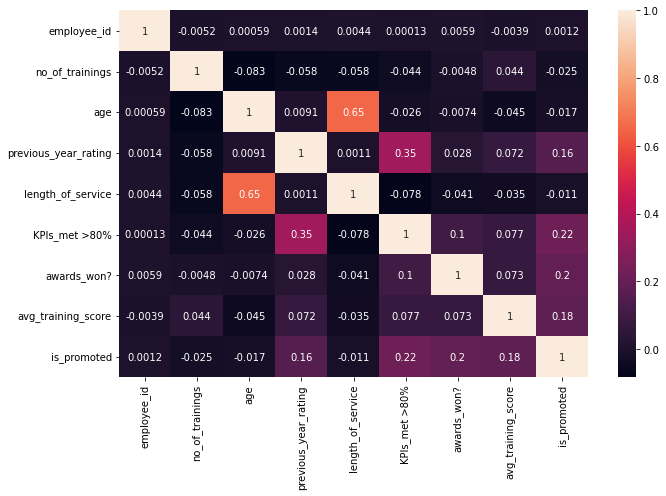

In [152]:
plt.figure(figsize=(10,7))
data_corr=data.corr()
sns.heatmap(data_corr,annot=True)
plt.savefig('Heatmap.png')
plt.tight_layout()
plt.show()

 We can see that Age and Length of servive have very high correlation

#### Categorical Features

In [153]:
cat_features

['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'Train/Test']

In [154]:
data.groupby('department').mean()['is_promoted'].sort_values()

department
Legal                0.051011
HR                   0.056245
R&D                  0.069069
Sales & Marketing    0.072031
Finance              0.081230
Operations           0.090148
Analytics            0.095665
Procurement          0.096386
Technology           0.107593
Name: is_promoted, dtype: float64

In [155]:
100.0*data[data['is_promoted']==1].groupby('department').count()['employee_id']/data[data['is_promoted']==1].groupby('department').count()['employee_id'].sum()

department
Analytics            10.968295
Finance               4.413025
HR                    2.913453
Legal                 1.135390
Operations           21.915167
Procurement          14.738646
R&D                   1.478149
Sales & Marketing    25.985433
Technology           16.452442
Name: employee_id, dtype: float64

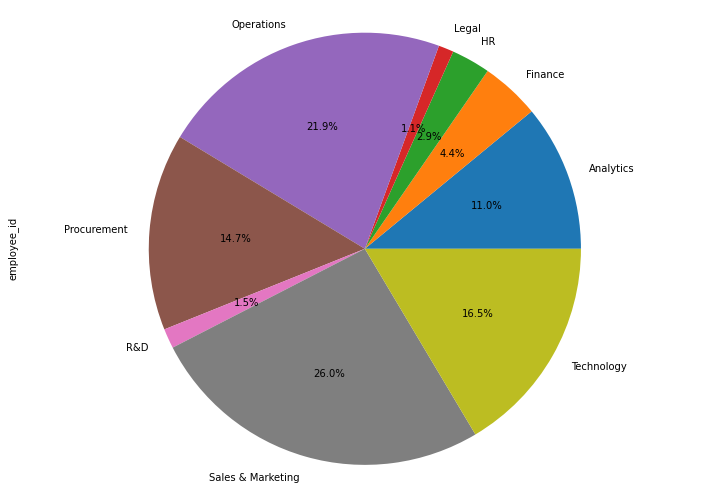

In [156]:
# plt.figure(figsize=(15,10))
data[data['is_promoted']==1].groupby('department').count()['employee_id'].plot.pie(y=data[data['is_promoted']==1].groupby('department').count()['employee_id'].index,figsize=(10,7),autopct='%1.1f%%')
plt.axis('equal')
plt.savefig('Dep_piechart.png')
plt.tight_layout()
plt.show()


We can clearly see that Sales & Marketing has the highest no of employees who get promotions . After sales we can see that a significant number of employees have been promoted from Operations

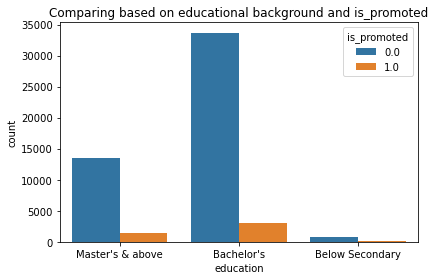

In [157]:
sns.countplot(x = 'education', hue = 'is_promoted', data = data)
plt.title('Comparing based on educational background and is_promoted')
plt.savefig('Education_barplot.png')
plt.tight_layout()
plt.show()


We can cearly see that employees with Bachelors have the Highest change of promotion

In [158]:
data[data['is_promoted']==1]['education'].value_counts(normalize=True)*100.0

Bachelor's          66.168060
Master's & above    32.358117
Below Secondary      1.473823
Name: education, dtype: float64

It is clear that People with Bachelors degree have the highest changes of promotion which is quiet opposite to as stated in out Hypothesis.

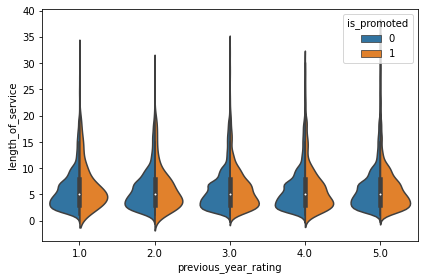

In [159]:
# violinplot plot
sns.violinplot(x = 'previous_year_rating', y = 'length_of_service', data = train, hue = 'is_promoted', split = True)
plt.savefig('Rating_violinplot.png')
plt.tight_layout()
plt.show()

We can see that the average length of service is generally between 3-5 yrs for employees to get promotions

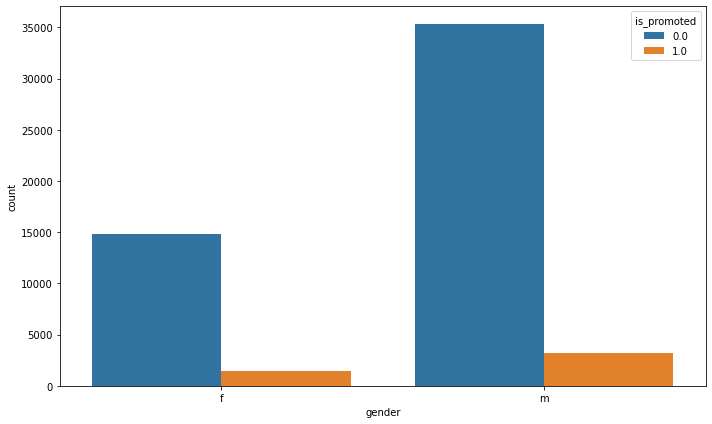

In [160]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender',hue='is_promoted',data=data)
plt.savefig('Genderplot.png')
plt.tight_layout()
plt.show()

In [161]:
data[data['is_promoted']==1]['gender'].value_counts(normalize=True)*100.0

m    68.573265
f    31.426735
Name: gender, dtype: float64

We can see that male gender have higher chances of promotion.

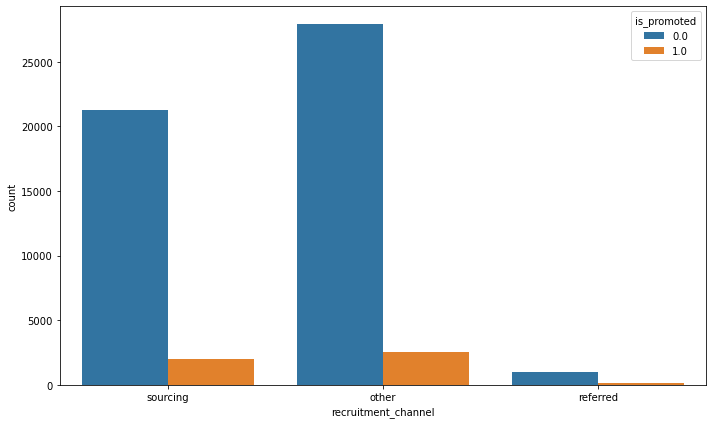

In [162]:
plt.figure(figsize=(10,6))
sns.countplot(x='recruitment_channel',hue='is_promoted',data=data)
plt.savefig('Recruitment_barplot.png')
plt.tight_layout()
plt.show()

In [163]:
data[data['is_promoted']==1]['recruitment_channel'].value_counts(normalize=True)*100.0

other       54.755784
sourcing    42.287918
referred     2.956298
Name: recruitment_channel, dtype: float64

We can see that people coming from "Other" recruiting channel are more likely to get promoted

In [164]:
data[data['is_promoted']==1]['awards_won?'].value_counts(normalize=True)*100.0

0    88.02485
1    11.97515
Name: awards_won?, dtype: float64

We can clearly see that the company does not care much for the awards while deceiding for promotions which is a bit strange!

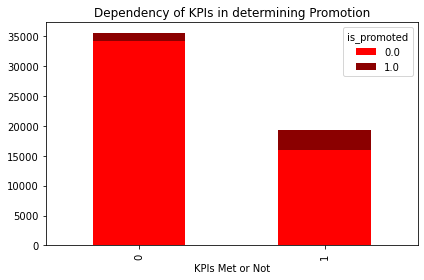

1    69.880034
0    30.119966
Name: KPIs_met >80%, dtype: float64


In [165]:
#dependency of KPIs with Promotion


pd.crosstab(data['KPIs_met >80%'], data['is_promoted']).plot(kind = 'bar', stacked = True, color = ['red', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion')
plt.xlabel('KPIs Met or Not')
plt.savefig('KPI_stackedplot.png')
plt.tight_layout()
plt.show()

print(data[data['is_promoted'] == 1]['KPIs_met >80%'].value_counts(normalize = True) * 100)

It is clear that employees who are able to meet the desired KPI are promoted

In [166]:
# plt.figure(figsize=(15,6))
# data.groupby('age').mean()['is_promoted'].sort_values().plot.bar()

1. We can see that since the retirement age is 60 and people nearing the the age like 57 are less likely to be promoted.
2. Whereas people within age group of 28-38 are more likely to be promoted as stated in the hypothesis.

#### Data Cleaning

<AxesSubplot:>

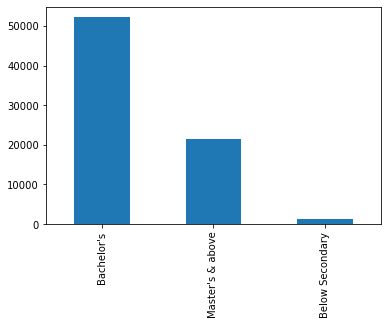

In [167]:
## We will confure the Null Values first.

data['education'].value_counts().plot.bar()

Logically we are filling missing values with '0' because Freshers with less than or equal to 1 Year of Experience may not have previous_year_rating at all

In [9]:
# data['education'].fillna(data['education'].mode()[0],inplace=True)
# data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0],inplace=True)

data['education']=data['education'].ffill(axis=0)
data['education']=data['education'].bfill(axis=0)
data['previous_year_rating'].fillna(0,inplace=True)

In [10]:
data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
Train/Test                  0
dtype: int64

In [11]:
gender_map={'m':0,'f':1}
data['gender']=data['gender'].map(gender_map)

In [12]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Train/Test
0,65438,Sales & Marketing,region_7,Master's & above,1,sourcing,1,35,5.0,8,1,0,49,0.0,Train
1,65141,Operations,region_22,Bachelor's,0,other,1,30,5.0,4,0,0,60,0.0,Train
2,7513,Sales & Marketing,region_19,Bachelor's,0,sourcing,1,34,3.0,7,0,0,50,0.0,Train
3,2542,Sales & Marketing,region_23,Bachelor's,0,other,2,39,1.0,10,0,0,50,0.0,Train
4,48945,Technology,region_26,Bachelor's,0,other,1,45,3.0,2,0,0,73,0.0,Train


In [13]:

# label_encoder object knows how to understand word labels. 
label_encoder = LabelEncoder()
# Encode labels in column 'Country'. 
data['education']= label_encoder.fit_transform(data['education'])

We are using Label Encoding for Education column because it are Ordinal in nature

In [14]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Train/Test
0,65438,Sales & Marketing,region_7,2,1,sourcing,1,35,5.0,8,1,0,49,0.0,Train
1,65141,Operations,region_22,0,0,other,1,30,5.0,4,0,0,60,0.0,Train
2,7513,Sales & Marketing,region_19,0,0,sourcing,1,34,3.0,7,0,0,50,0.0,Train
3,2542,Sales & Marketing,region_23,0,0,other,2,39,1.0,10,0,0,50,0.0,Train
4,48945,Technology,region_26,0,0,other,1,45,3.0,2,0,0,73,0.0,Train


##### Feature Hashing:
Feature hashing maps each category in a categorical feature to an integer within a pre-determined range. This output range is smaller than the input range so multiple categories may be mapped to the same integer. Feature hashing is very similar to one-hot encoding but with a control over the output dimensions.

To implement feature hashing in python we can use category_encoder, a library containing sklearn compabitable category encoders.

In [15]:
## Feature Hashing for Region colum. It is simply converting the string into vector form

unique_region = np.unique(data[['region']])
print("Total unique regions:", len(unique_region))
print(unique_region)

Total unique regions: 34
['region_1' 'region_10' 'region_11' 'region_12' 'region_13' 'region_14'
 'region_15' 'region_16' 'region_17' 'region_18' 'region_19' 'region_2'
 'region_20' 'region_21' 'region_22' 'region_23' 'region_24' 'region_25'
 'region_26' 'region_27' 'region_28' 'region_29' 'region_3' 'region_30'
 'region_31' 'region_32' 'region_33' 'region_34' 'region_4' 'region_5'
 'region_6' 'region_7' 'region_8' 'region_9']


In [16]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(data['region'])
hashed_features = hashed_features.toarray()
hashed_features = pd.DataFrame(hashed_features)
print(hashed_features)
data = pd.concat((data, hashed_features),axis=1)

         0    1    2    3    4    5
0     -1.0  3.0  0.0  0.0  0.0  0.0
1     -1.0  3.0 -1.0  2.0  0.0  0.0
2     -1.0  2.0 -1.0  0.0  0.0  1.0
3      0.0  3.0 -1.0  1.0  0.0  0.0
4     -1.0  3.0  0.0  1.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...
78293 -1.0  3.0 -1.0  1.0  0.0  0.0
78294  0.0  3.0 -1.0  1.0  0.0  0.0
78295 -1.0  2.0  0.0  0.0  0.0  0.0
78296  0.0  2.0 -1.0  0.0  0.0  0.0
78297 -1.0  2.0  0.0  0.0  0.0  0.0

[78298 rows x 6 columns]


In [17]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Train/Test,0,1,2,3,4,5
0,65438,Sales & Marketing,region_7,2,1,sourcing,1,35,5.0,8,1,0,49,0.0,Train,-1.0,3.0,0.0,0.0,0.0,0.0
1,65141,Operations,region_22,0,0,other,1,30,5.0,4,0,0,60,0.0,Train,-1.0,3.0,-1.0,2.0,0.0,0.0
2,7513,Sales & Marketing,region_19,0,0,sourcing,1,34,3.0,7,0,0,50,0.0,Train,-1.0,2.0,-1.0,0.0,0.0,1.0
3,2542,Sales & Marketing,region_23,0,0,other,2,39,1.0,10,0,0,50,0.0,Train,0.0,3.0,-1.0,1.0,0.0,0.0
4,48945,Technology,region_26,0,0,other,1,45,3.0,2,0,0,73,0.0,Train,-1.0,3.0,0.0,1.0,0.0,0.0


In [18]:
data.groupby('department').size()


department
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
Operations           16112
Procurement          10158
R&D                   1439
Sales & Marketing    24155
Technology           10149
dtype: int64

#### Feature  Engineering

###### In this section we will try the Discretisation of continous column using Decision Tree

Discretisation is a process of converting the continous variable into discrete variable with the help of bins.

In this section we will convert the continous variable('Age') into discrete variable .

Steps to Follow:

Spit the data into train_test and fit the Decision Tree(depth=1,2,3,4) using the X=continous variable ; y=Target

The continous variable are then replaced by the predicted_probability.

In [19]:
X=data.loc[data['Train/Test']=='Train',['age','is_promoted','length_of_service']]
y=data.loc[data['Train/Test']=='Train',['is_promoted']]

# test.drop(['Response'],axis=1,inplace=True) ## For Final Prediction

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 2)

In [20]:
### Fit the Decision Tree
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.age.to_frame(),x_train.is_promoted)

DecisionTreeClassifier(max_depth=2)

In [21]:
## Calculate the probability
x_train['Age_tree']=dtree.predict_proba(x_train.age.to_frame())[:,1]

C:\Users\Dishaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
x_train.head()

,age,is_promoted,length_of_service,Age_tree
32316,43,1.0,12,0.076625
39911,23,0.0,2,0.068946
18164,28,0.0,3,0.090803
4498,38,0.0,7,0.090803
47431,46,0.0,5,0.064393


In [23]:
## Checking the uniqe values.
x_train['Age_tree'].unique()

array([0.07662464, 0.06894587, 0.09080322, 0.06439309])

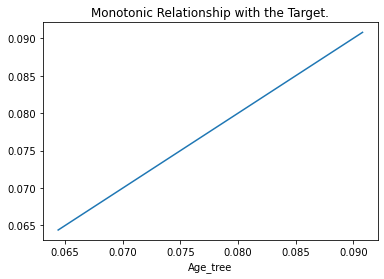

In [24]:
# x_train.groupby('Age_tree').mean()
x_train.groupby(['Age_tree'])['is_promoted'].mean().plot()
plt.title('Monotonic Relationship with the Target.')

plt.savefig('DC_age.png')

plt.show()

<AxesSubplot:xlabel='Age_tree'>

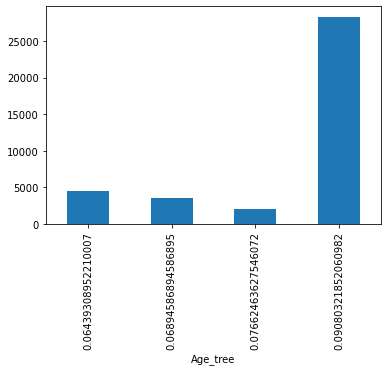

In [25]:
x_train.groupby(['Age_tree'])['is_promoted'].count().plot.bar()

In [26]:
age_limit=pd.concat([x_train.groupby('Age_tree')['age'].min(),x_train.groupby('Age_tree')['age'].max()],axis=1)
age_limit

,age,age
Age_tree,,
0.064393,45,60
0.068946,20,26
0.076625,42,44
0.090803,27,41


In [27]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, x_train.age.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.516038     0.001645
1      2      0.523911     0.002665
2      3      0.526817     0.003283
3      4      0.526375     0.002082


In [28]:
data.loc[(data['age']>=20) & (data['age']<26),'Age_label']='Freshers' ## Just starting out
data.loc[(data['age']>=26) & (data['age']<41),'Age_label']='Mid-Seniors' ## Young Ppl
data.loc[(data['age']>=41) & (data['age']<44),'Age_label']='Seniors' ## Mid-Age Ppl
data.loc[(data['age']>=44) & (data['age']<=60),'Age_label']='Close to Retuirement' ## Old Age

data.loc[(data['age']>=20) & (data['age']<26),'age']=0 ## Just starting out
data.loc[(data['age']>=26) & (data['age']<41),'age']=1 ## Young Ppl
data.loc[(data['age']>=41) & (data['age']<44),'age']=2 ## Mid-Age Ppl
data.loc[(data['age']>=44) & (data['age']<=60),'age']=3 ## Old Age

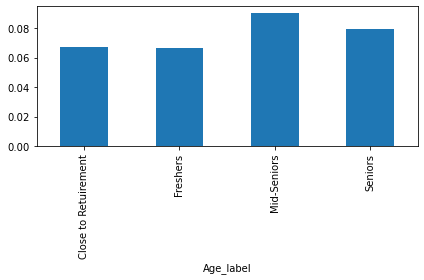

In [29]:
data.groupby('Age_label').mean()['is_promoted'].plot.bar()
plt.savefig('Age_label_plot.png')
plt.tight_layout()
plt.show()

We can clearly see that Mid-Senior have the highest change of promotions

In [30]:
dtree_LS=DecisionTreeClassifier(max_depth=2)
dtree_LS.fit(x_train.length_of_service.to_frame(),x_train.is_promoted)

x_train['length_of_service_tree']=dtree_LS.predict_proba(x_train.length_of_service.to_frame())[:,1]

C:\Users\Dishaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='length_of_service_tree'>

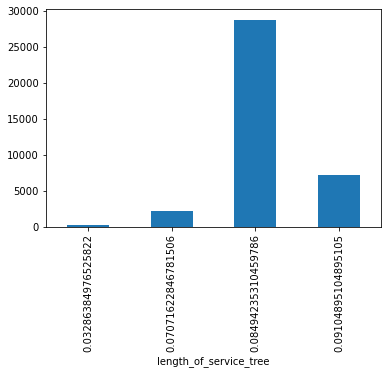

In [31]:
## checkthe no of customer per bin
x_train.groupby('length_of_service_tree')['is_promoted'].count().plot.bar()

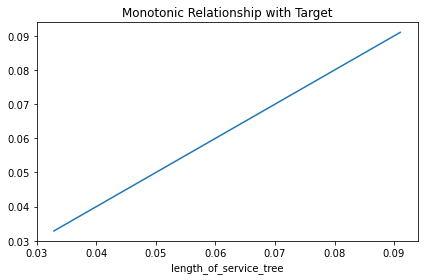

In [32]:
x_train.groupby('length_of_service_tree')['is_promoted'].mean().plot()
plt.title('Monotonic Relationship with Target')
plt.savefig('DC_length_service.png')
plt.tight_layout()
plt.show()

In [33]:
length_of_service_tree_limit=pd.concat([x_train.groupby('length_of_service_tree')['length_of_service'].min(),x_train.groupby('length_of_service_tree')['length_of_service'].max()],axis=1)
length_of_service_tree_limit

,length_of_service,length_of_service
length_of_service_tree,,
0.032864,24,34
0.070716,14,23
0.084942,1,7
0.091049,8,13


In [34]:
data.loc[(data['length_of_service']>=1) & (data['length_of_service']<7),'length_of_service_label']='Freshers' ## Just starting out
data.loc[(data['length_of_service']>=7) & (data['length_of_service']<13),'length_of_service_label']='Mid-Seniors' ## Young Ppl
data.loc[(data['length_of_service']>=13) & (data['length_of_service']<23),'length_of_service_label']='Seniors' ## Mid-Age Ppl
data.loc[(data['length_of_service']>=23) & (data['length_of_service']>34),'length_of_service_label']='Close to Retuirement' ## Old Age

data.loc[(data['length_of_service']>=1) & (data['length_of_service']<7),'length_of_service']=0 ## Just starting out
data.loc[(data['length_of_service']>=7) & (data['length_of_service']<13),'length_of_service']=1 ## Young Ppl
data.loc[(data['length_of_service']>=13) & (data['length_of_service']<23),'length_of_service']=2 ## Mid-Age Ppl
data.loc[(data['length_of_service']>=23) & (data['length_of_service']>34),'length_of_service']=3 ## Old Age

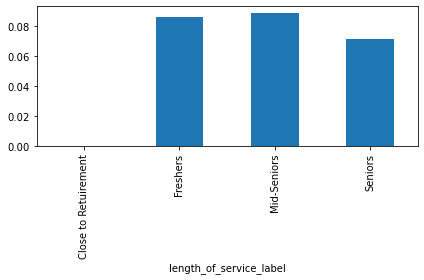

In [195]:
data.groupby('length_of_service_label').mean()['is_promoted'].plot.bar()
plt.savefig('Length_service_label_plot.png')
plt.tight_layout()
plt.show()

This does makes sense that employees who are closer to retuirement are not conired for promotion whereas mid-seniors are given more preference

#### Data Preparation for ML

In [35]:
## Data preparation for modelling
data=pd.get_dummies(data,columns=['department','recruitment_channel','age','length_of_service'],drop_first=True)

In [36]:
data.head()

,employee_id,region,education,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Train/Test,0,1,2,3,4,5,Age_label,length_of_service_label,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing,age_1,age_2,age_3,length_of_service_1,length_of_service_2,length_of_service_3,length_of_service_23,length_of_service_24,length_of_service_25,length_of_service_26,length_of_service_27,length_of_service_28,length_of_service_29,length_of_service_30,length_of_service_31,length_of_service_32,length_of_service_33,length_of_service_34
0,65438,region_7,2,1,1,5.0,1,0,49,0.0,Train,-1.0,3.0,0.0,0.0,0.0,0.0,Mid-Seniors,Mid-Seniors,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,65141,region_22,0,0,1,5.0,0,0,60,0.0,Train,-1.0,3.0,-1.0,2.0,0.0,0.0,Mid-Seniors,Freshers,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7513,region_19,0,0,1,3.0,0,0,50,0.0,Train,-1.0,2.0,-1.0,0.0,0.0,1.0,Mid-Seniors,Mid-Seniors,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2542,region_23,0,0,2,1.0,0,0,50,0.0,Train,0.0,3.0,-1.0,1.0,0.0,0.0,Mid-Seniors,Mid-Seniors,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48945,region_26,0,0,1,3.0,0,0,73,0.0,Train,-1.0,3.0,0.0,1.0,0.0,0.0,Close to Retuirement,Freshers,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# data.drop(['length_of_service'],axis=1,inplace=True)

In [38]:
train_df=data.loc[data['Train/Test']=='Train']
test_df=data.loc[data['Train/Test']=='Test']

train_df.drop(['Train/Test','employee_id','Age_label','length_of_service_label','region'],axis=1,inplace=True)
test_df.drop(['Train/Test','employee_id','Age_label','is_promoted','length_of_service_label','region'],axis=1,inplace=True)

C:\Users\Dishaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
test_df.shape, train_df.shape

((23490, 41), (54808, 42))

In [40]:
X=train_df.drop(['is_promoted'],axis=1)
y=train_df['is_promoted'].astype('int')

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.30 ,random_state = 5)

In [42]:
X_train.head()

,education,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,0,1,2,3,4,5,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing,age_1,age_2,age_3,length_of_service_1,length_of_service_2,length_of_service_3,length_of_service_23,length_of_service_24,length_of_service_25,length_of_service_26,length_of_service_27,length_of_service_28,length_of_service_29,length_of_service_30,length_of_service_31,length_of_service_32,length_of_service_33,length_of_service_34
5667,2,0,1,3.0,0,0,55,-1.0,3.0,-1.0,2.0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33263,2,1,1,4.0,0,0,74,-1.0,2.0,-1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47588,0,1,1,3.0,1,0,56,-1.0,3.0,-1.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52924,0,0,1,3.0,0,0,60,0.0,2.0,-1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4054,0,0,1,3.0,1,0,52,-1.0,3.0,-1.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# Baseline Model

lr=LogisticRegression(solver="liblinear", random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.872


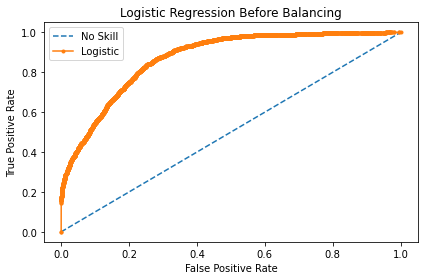

In [207]:
## Before Balancing

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('Logistic Regression Before Balancing')
plt.savefig('Logistic_Regression_Before_Balancing.png')
plt.tight_layout()
plt.show()

In [53]:
# ## Before Balancing

# ns_probs = [0 for _ in range(len(y_test))]

# lr_probs = lr.predict_proba(X_test)
# # keep probabilities for the positive outcome only
# lr_probs = lr_probs[:, 0]
# # calculate scores
# ns_auc = roc_auc_score(y_test, ns_probs)
# lr_auc = roc_auc_score(y_test, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# # plot the roc curve for the model
# plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# # show the legend
# plt.legend()
# # show the plot

# plt.show()

##### We can see that with using simplest Classification Algorithm we are able to get ROC-AUC score as 0.87 for Oversampled Label (0) and 0.12 score for Undersampled label(1).

In [54]:
# lr_pred=lr.predict(X_test)
# lr_pred

In [55]:
# f1_score(y_test, lr_pred,average='weighted')

In [44]:
## Applying Balancing Technique

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

## Scaling
rbScaler= RobustScaler()
X_balanced_scaled=rbScaler.fit_transform(X_balanced)

X_train_balanced,X_test_balanced,y_train_balanced,y_test_balanced=train_test_split(X_balanced,y_balanced,test_size=0.3,random_state=5)

In [45]:
X_train_balanced.shape

(70196, 41)

In [46]:
X_train_balanced.head()

,education,gender,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,avg_training_score,0,1,2,3,4,5,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,recruitment_channel_referred,recruitment_channel_sourcing,age_1,age_2,age_3,length_of_service_1,length_of_service_2,length_of_service_3,length_of_service_23,length_of_service_24,length_of_service_25,length_of_service_26,length_of_service_27,length_of_service_28,length_of_service_29,length_of_service_30,length_of_service_31,length_of_service_32,length_of_service_33,length_of_service_34
47667,0,0,1,3.0,0,0,87,-1.0,2.0,-2.0,0.000000,0.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59497,2,0,1,5.0,0,0,81,-1.0,3.0,-1.0,1.119746,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15777,0,0,1,5.0,0,0,50,-1.0,2.0,-1.0,1.000000,0.0,0.0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25809,0,0,1,3.0,0,0,61,-1.0,3.0,-1.0,1.000000,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70904,0,1,3,2.0,0,0,86,-1.0,3.0,-1.0,1.000000,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


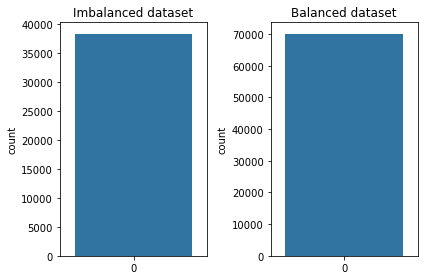

In [47]:
plt.subplot(121)
sns.countplot(y_train)
plt.title('Imbalanced dataset')

plt.subplot(122)
sns.countplot(y_train_balanced)
plt.title('Balanced dataset')

plt.savefig('Balanced_Lbel.png')
plt.tight_layout()
plt.show()

In [48]:
lr_balanced=LogisticRegression(solver="liblinear", random_state=0)

lr_balanced.fit(X_train_balanced,y_train_balanced)

LogisticRegression(random_state=0, solver='liblinear')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.853


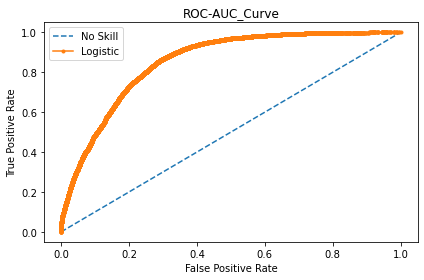

In [213]:
## After Balancing
ns_probs = [0 for _ in range(len(y_test_balanced))]


lr_probs = lr_balanced.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc = roc_auc_score(y_test_balanced, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_balanced, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.title('ROC-AUC_Curve')

plt.savefig('ROC-AUC_Curve_balanced.png')
plt.tight_layout()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.147


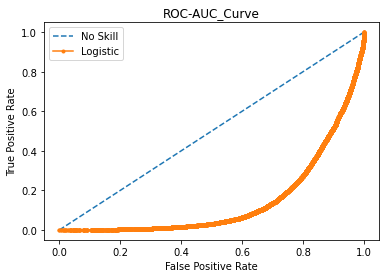

In [61]:
ns_probs = [0 for _ in range(len(y_test_balanced))]


lr_probs = lr_balanced.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 0]
# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc = roc_auc_score(y_test_balanced, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_balanced, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.title('ROC-AUC_Curve')

plt.show()

##### Now after applying SMOTE technique We can see that with using simplest Classification Algorithm we are able to get ROC-AUC score as 0.95 for Oversampled Label (0) and 0.46 score for Undersampled label(1).

In [49]:
## Testing on different models

models=[]

models.append(('LogisticRegression',LogisticRegression(solver="liblinear", random_state=5)))
models.append(('DecisionTree',DecisionTreeClassifier(random_state=5)))
models.append(('RandomForest',RandomForestClassifier(random_state=5)))
models.append(('XBoost',XGBClassifier(random_state=5,max_depth=5)))
models.append(('LigntGBM',lgb.LGBMClassifier(random_state=5,max_depth=5,verbose=0)))
models.append(('CatBoost',CatBoostClassifier(random_state=5,max_depth=5,verbose=0)))

# models.append(('svm',SVC(random_state=5)))
# models.append(('knn',KNeighborsClassifier()))

In [50]:
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True,random_state=5)
    cv_score=cross_val_score(model,X_balanced,y_balanced,cv=kf,scoring='f1')
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    
    
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True,random_state=5)
    cv_score=cross_val_score(model,X,y,cv=kf,scoring='f1')
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)

LogisticRegression: 0.777597 (0.002163)
DecisionTree: 0.930906 (0.002570)
RandomForest: 0.947725 (0.001328)
XBoost: 0.919579 (0.000949)
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

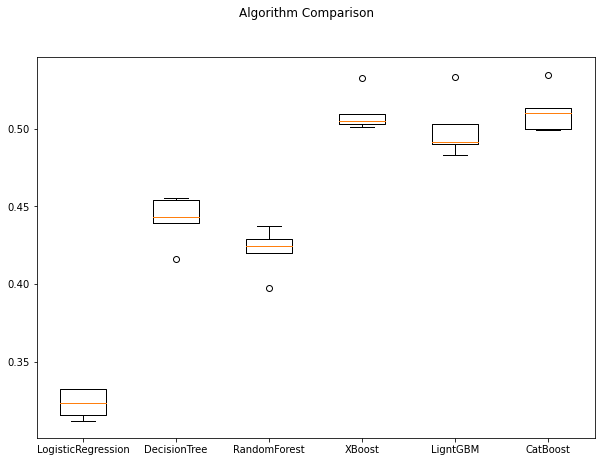

In [51]:
fig = plt.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('model_comparison.png')
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

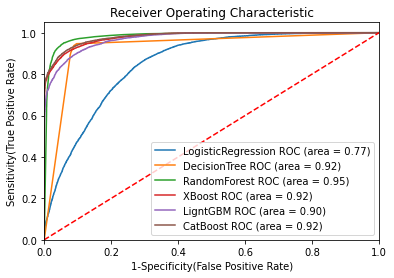

In [55]:
for name,model in models:
#     model = m['model'] # select the model
    model.fit(X_train_balanced,y_train_balanced) # train the model
    y_pred=model.predict(X_test_balanced) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test_balanced, model.predict_proba(X_test_balanced)[:,1])
# Calculate Area under the curve to display on the plot
    auc =roc_auc_score(y_test_balanced,model.predict(X_test_balanced))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('Multi_model_ROC-AUC Curve.png')
plt.show()   # Display

In [127]:
rtree=RandomForestClassifier(random_state=5)
rtree.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(random_state=5)

No Skill: ROC AUC=0.500
Test Score: ROC AUC=0.985
Train Score: ROC AUC=0.999


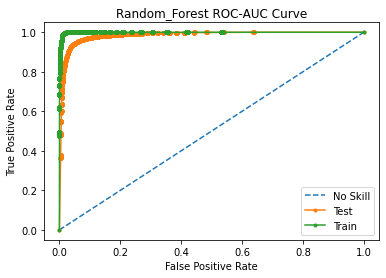

In [128]:
ns_probs = [0 for _ in range(len(y_test_balanced))]

## Tst
lr_probs_test = rtree.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs_test = lr_probs_test[:, 1]

## Train
lr_probs_train = rtree.predict_proba(X_train_balanced)
# keep probabilities for the positive outcome only
lr_probs_train = lr_probs_train[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc_test = roc_auc_score(y_test_balanced, lr_probs_test)
lr_auc_train = roc_auc_score(y_train_balanced, lr_probs_train)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Test Score: ROC AUC=%.3f' % (lr_auc_test))
print('Train Score: ROC AUC=%.3f' % (lr_auc_train))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test_balanced, lr_probs_test)
lr_fpr_train, lr_tpr_train, _ = roc_curve(y_train_balanced, lr_probs_train)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr_test, lr_tpr_test, marker='.', label='Test')
plt.plot(lr_fpr_train, lr_tpr_train, marker='.', label='Train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('Random_Forest ROC-AUC Curve')
plt.savefig('Random_Forest ROC-AUC Curve.png')
plt.show()

In [69]:
# xgboost=XGBClassifier(random_state=5,max_depth=5)
# xgboost.fit(X_train_balanced,y_train_balanced)

catboost=CatBoostClassifier(random_state=5,verbose=0)
catboost.fit(X_train_balanced,y_train_balanced)

In [70]:
f1_score(y_test_balanced,catboost.predict(X_test_balanced))

0.9287743574317324

##### Voting Classifier

https://towardsdatascience.com/use-voting-classifier-to-improve-the-performance-of-your-ml-model-805345f9de0e

In [56]:


# voting_model = VotingClassifier(estimators=[

# ('Random_Forest_Best',RandomForestClassifier(random_state=5))
# ('XGBoost_Best', XGBClassifier(random_state=5,max_depth=5)),
# ('CatBoost_Best', CatBoostClassifier(random_state=5,max_depth=5,verbose=0)),
# ('LightGBM_Best', lgb.LGBMClassifier(random_state=5,max_depth=5,verbose=0)),
# ],
# voting='soft',weights=[5,5,5,5.2])
# voting_model.fit(X_train_balanced,y_train_balanced)
# predictions_of_voting = voting_model.predict_proba( X_test_balanced )[::,1]


clf1 = RandomForestClassifier(random_state=5)
clf2 = XGBClassifier(random_state=5,max_depth=5)
clf3 = CatBoostClassifier(random_state=5,max_depth=5,verbose=0)
clf4 = lgb.LGBMClassifier(subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15,
                                             n_estimators=494,
                                             max_depth=5,
                         random_state=5)

eclf = VotingClassifier(estimators=[('Rtree', clf1), ('XBG', clf2), ('CBoost', clf3), ('LGBM', clf4)],
                        voting='soft', weights=[5,5,5,5.2])

eclf.fit(X_train_balanced,y_train_balanced)
predictions_of_voting = eclf.predict_proba( X_test_balanced )[::,1]

In [62]:
eclf.predict(X_test_balanced)

array([0, 1, 1, ..., 1, 0, 0])

In [63]:
f1_score(y_test_balanced,eclf.predict(X_test_balanced))

0.9382411725516322

### Hyper Parameter Tuning

In [136]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 3,scoring='f1',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_balanced,y_balanced)

# # param_dist = { "learning_rate": np.linspace(0,0.2,5)
# #                ,"max_depth": randint(3, 10)}

# param_grid = {
#     'n_estimators': [25, 50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }
               
# #Instantiate RandomSearchCV object
# rscv = RandomizedSearchCV(RandomForestClassifier() , param_grid, scoring='f1', cv =5,verbose=0)

# #Fit the model
# rscv.fit(X_balanced, y_balanced)

# # Print the tuned parameters and score
# print(rscv.best_params_)
# print(rscv.best_score_)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020945F780C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020945F78448>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020945F78248>},
                   random_state=3, return_train_score=True, scoring='f1')

In [139]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 9}

In [140]:
dt = DecisionTreeClassifier(**rsearch.best_params_)
dt.fit(X_train_balanced,y_train_balanced)

DecisionTreeClassifier(max_depth=11, min_samples_split=9)

In [89]:
# rtree=RandomForestClassifier(random_state=5,n_estimators=100,max_leaf_nodes=9,max_depth=6)
# rtree.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, random_state=5)

In [148]:
## Feature Importance
# plt.figure(figsize=(10,7))
# coef=pd.Series(rtree.feature_importances_,X_train_balanced.columns).sort_values(ascending=False)
# coef.plot(kind='bar', label='Feature Importance')

imp = pd.DataFrame(dt.feature_importances_,index=X_balanced.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
avg_training_score,0.343584
KPIs_met >80%,0.186434
previous_year_rating,0.130091
department_Sales & Marketing,0.085168
3,0.028894
1,0.026225
0,0.026067
department_Technology,0.023731
department_Operations,0.019056
department_Procurement,0.016221


In [149]:
X_new = X_balanced[[          'avg_training_score',                'KPIs_met >80%',
               'previous_year_rating', 'department_Sales & Marketing',
                                    3,                              1,
                                    0,        'department_Technology',
              'department_Operations',       'department_Procurement',
                   'department_Legal',              'no_of_trainings',
                             'gender',           'department_Finance',
                                    5]]
y_new = y_balanced

In [150]:
dt = DecisionTreeClassifier()

params = {'max_depth': sp_randint(2,12),
          'min_samples_split': sp_randint(2,12),
          'min_samples_leaf' : sp_randint(1,12)
          }

rsearch = RandomizedSearchCV(dt, param_distributions= params, n_iter=200 , 
                             cv = 10,scoring='f1',random_state=3,n_jobs=-1,
                            return_train_score=True)

rsearch.fit(X_new,y_new)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020947E4C3C8>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020931F8D0C8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020945F5A288>},
                   random_state=3, return_train_score=True, scoring='f1')

In [151]:
rsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 9}

##### Making Final Predictions

In [141]:

# predsTest=rtree.predict(test_df[['avg_training_score','previous_year_rating','KPIs_met >80%','department_Sales & Marketing','education','no_of_trainings']])
# predsTest


# predsTest=rtree.predict(test_df)
# predsTest

predsTest=eclf.predict(test_df)
predsTest

array([0, 0, 0, ..., 0, 0, 1])

In [142]:
submission = pd.DataFrame({
        "employee_id": test['employee_id'],
        "is_promoted":predsTest
    })
submission.to_csv('VotingClassifier_V2.csv', index=False)